<a href="https://colab.research.google.com/github/rygo1232/ryan1/blob/main/Copy_of_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of rows
num_rows = 1000

# Generate synthetic data
data = {
    'Date': np.random.choice(range(1980, 2023), size=num_rows),  # Years between 1980 and 2023
    'loss': np.random.randint(100, 100000, size=num_rows),  # Random loss values
    'Internal_fraud': np.random.randint(0, 1000, size=num_rows),
    'External_fraud': np.random.randint(0, 10000, size=num_rows),
    'EmployPWS': np.random.randint(1, 5000, size=num_rows),
    'ClientsPBP': np.random.randint(1, 30000, size=num_rows),
    'Disaster': np.random.randint(0, 1000, size=num_rows),
    'ICTFailure': np.random.randint(0, 500, size=num_rows),
    'ExecutionDP': np.random.randint(100, 10000, size=num_rows),
    'Company_Size': np.random.choice(['Small', 'Medium', 'Large'], size=num_rows),
    'Region': np.random.choice(['North America', 'Europe', 'Asia', 'Australia'], size=num_rows),
    'Industry': np.random.choice(['Finance', 'Healthcare', 'Retail', 'Technology'], size=num_rows),
    'Incident_Type': np.random.choice(['Fraud', 'System Failure', 'Natural Disaster'], size=num_rows),
    'Severity': np.random.choice(['Low', 'Medium', 'High'], size=num_rows),
    'Reported': np.random.choice(['Yes', 'No'], size=num_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save to CSV if needed
df.to_excel('aiOPR_data.xlsx', index=False)

   Date   loss  Internal_fraud  External_fraud  EmployPWS  ClientsPBP  \
0  2018  43972             918            8623       2350       27414   
1  2008  46297             427            5469       1933        5209   
2  1994  55280             293            6256       3295         688   
3  2022  23810             851            9398       1758       16914   
4  1987  29586             150            1169       1117       28019   

   Disaster  ICTFailure  ExecutionDP Company_Size         Region    Industry  \
0       523           6         9654        Small  North America     Finance   
1       612         154         5478        Large           Asia      Retail   
2       155           9         6333       Medium         Europe  Healthcare   
3       339          33         2763       Medium      Australia     Finance   
4       124          35         9565        Small           Asia  Technology   

      Incident_Type Severity Reported  
0             Fraud      Low      Yes  


In [ ]:
# Load dataset
file_path = "/content/ORXdataSev.xlsx"
data = pd.read_excel(file_path)

# Rename columns for readability
data.rename(columns={
    "Unnamed: 0": "Year",
    "Total Gross loss in Millions": "Total_Loss",
    "Assuming 56% of loss due to Bank Loss( in Millions)": "Bank_Loss",
    "Assuming 1.5699% due to Internal Loss": "Internal_Loss",
    "Assuming 14.6711% due to External fraud": "External_Fraud_Loss",
    "Assuming 4.7840% due to EPWS": "EPWS_Loss",
    "Assuming 51.8433% due to CPBP": "CPBP_Loss",
    "Assuming 0.5220% due to DPS": "DPS_Loss",
    "Assuming 1.9173% due to TIF": "TIF_Loss",
    "Assuming 24.6925% due to EDPM": "EDPM_Loss"
}, inplace=True)

# Drop non-relevant columns
data.drop(columns=['Year'], inplace=True)

# Normalize numerical data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data_scaled, test_size=0.2, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: '/content/ORXdataSev.xlsx'

Define the Autoencoder Model

In [ ]:
# Define Autoencoder structure
input_dim = train_data.shape[1]

autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')  # Output layer reconstructs input
])

autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss


 Train the Model


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1274 - val_loss: 0.1360
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 0.1269 - val_loss: 0.1364
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1264 - val_loss: 0.1367
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1258 - val_loss: 0.1372
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1253 - val_loss: 0.1376
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1247 - val_loss: 0.1380
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1242 - val_loss: 0.1385
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1236 - val_loss: 0.1390
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1230 - val_loss: 0.1395
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1224 - val_loss: 0.1400
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.1218 - val_loss: 0.1405
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1212 - val_loss: 0.14

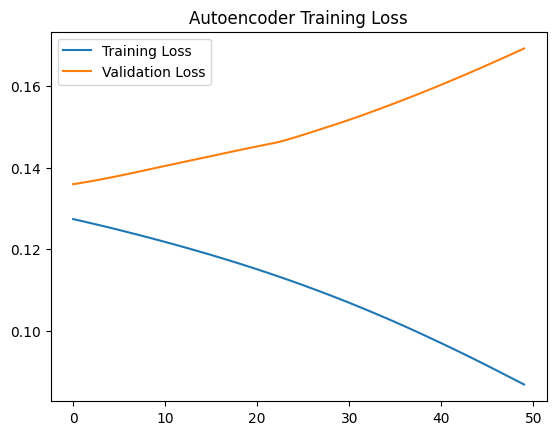

In [ ]:
history = autoencoder.fit(train_data, train_data,
                          epochs=50,  # Train for 50 epochs
                          batch_size=8,
                          validation_data=(test_data, test_data),
                          verbose=1)

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()


Detect Anomalies


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


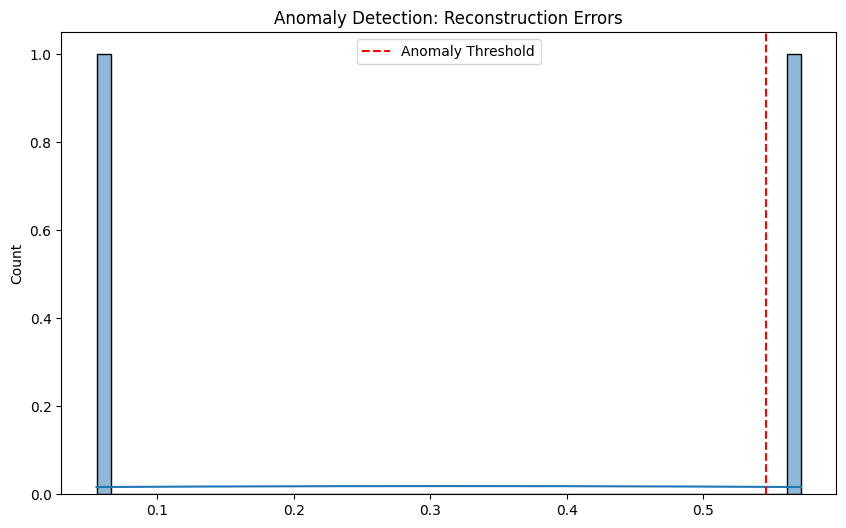

In [ ]:
# Compute reconstruction errors
reconstructed = autoencoder.predict(test_data)
mse = np.mean(np.abs(test_data - reconstructed), axis=1)

# Set threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = mse > threshold

# Plot anomalies
plt.figure(figsize=(10, 6))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label="Anomaly Threshold")
plt.legend()
plt.title("Anomaly Detection: Reconstruction Errors")
plt.show()


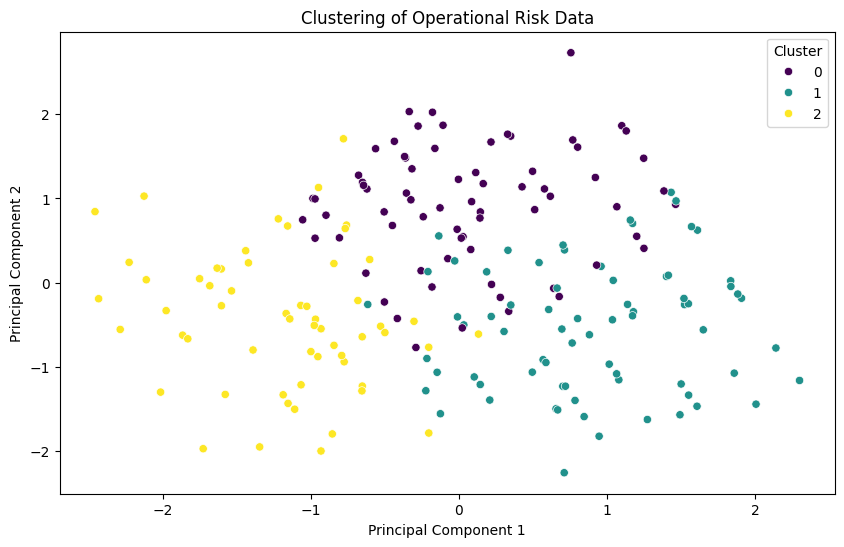

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         7

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[ 4  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  7]]


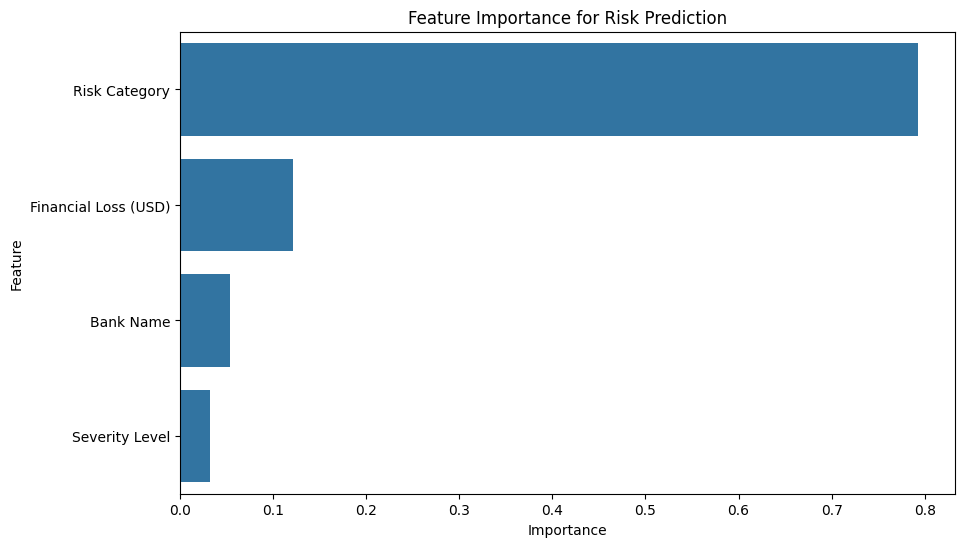

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Selecting features for clustering and classification
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: PCA with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Train a Random Forest Classifier for Risk Prediction
y = df["Risk Category"]
X_train, X_test, y_train, y_test = X_scaled[:150], X_scaled[150:], y[:150], y[150:]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance for Risk Prediction")
plt.show()

# Save the processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)


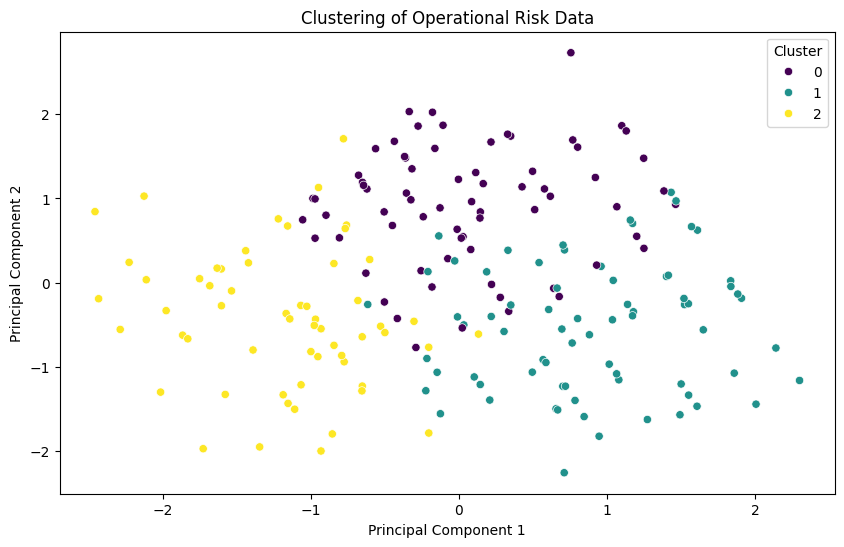

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         7

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[ 4  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  7]]


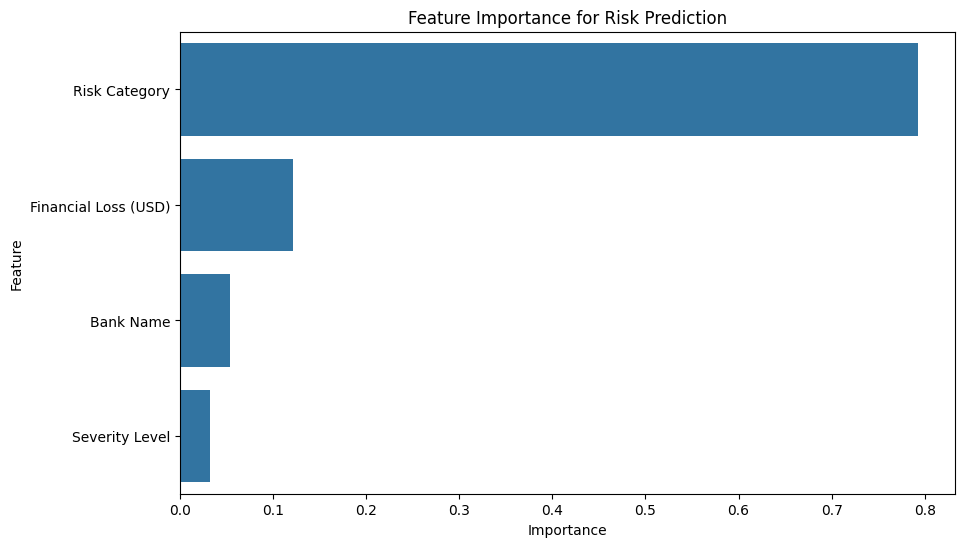

<ipython-input-3-04d251bd9110>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")


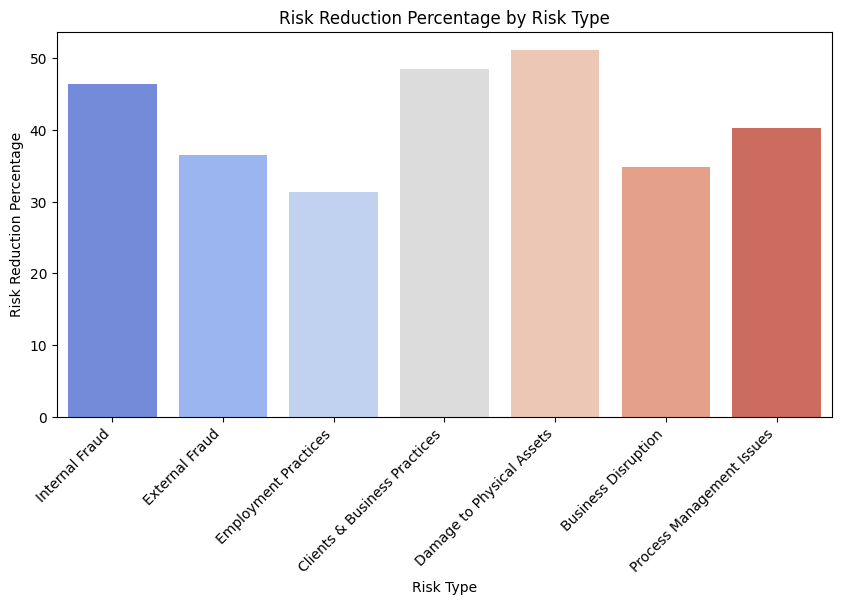

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Selecting features for clustering and classification
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: PCA with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Train a Random Forest Classifier for Risk Prediction
y = df["Risk Category"]
X_train, X_test, y_train, y_test = X_scaled[:150], X_scaled[150:], y[:150], y[150:]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance for Risk Prediction")
plt.show()

# Save the processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)

# Risk Reduction Analysis
risk_factors = ["Internal Fraud", "External Fraud", "Employment Practices", "Clients & Business Practices", "Damage to Physical Assets", "Business Disruption", "Process Management Issues"]
risk_before = np.random.uniform(0.6, 0.8, len(risk_factors))
risk_after = risk_before - np.random.uniform(0.2, 0.4, len(risk_factors))
risk_reduction = (risk_before - risk_after) / risk_before * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Risk Reduction Percentage by Risk Type")
plt.xlabel("Risk Type")
plt.ylabel("Risk Reduction Percentage")
plt.show()


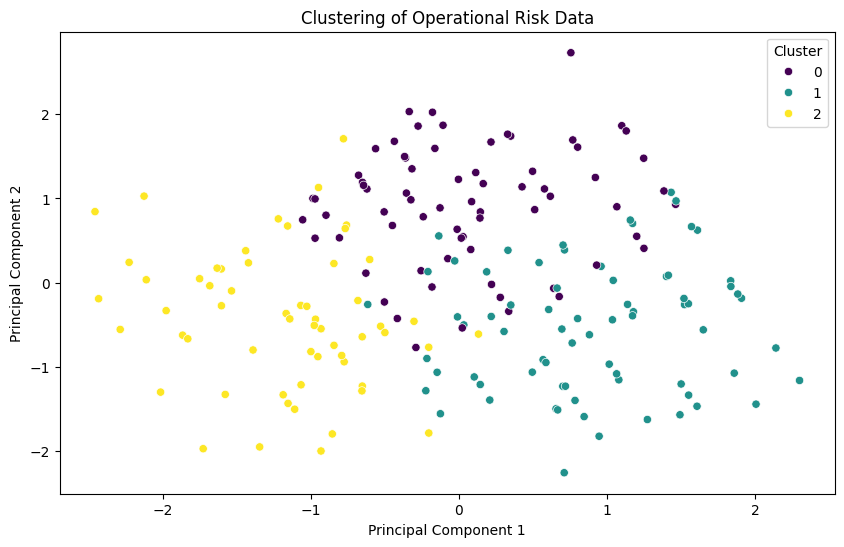

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         7

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[ 4  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  7]]


<ipython-input-4-9e45cf9377f2>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")


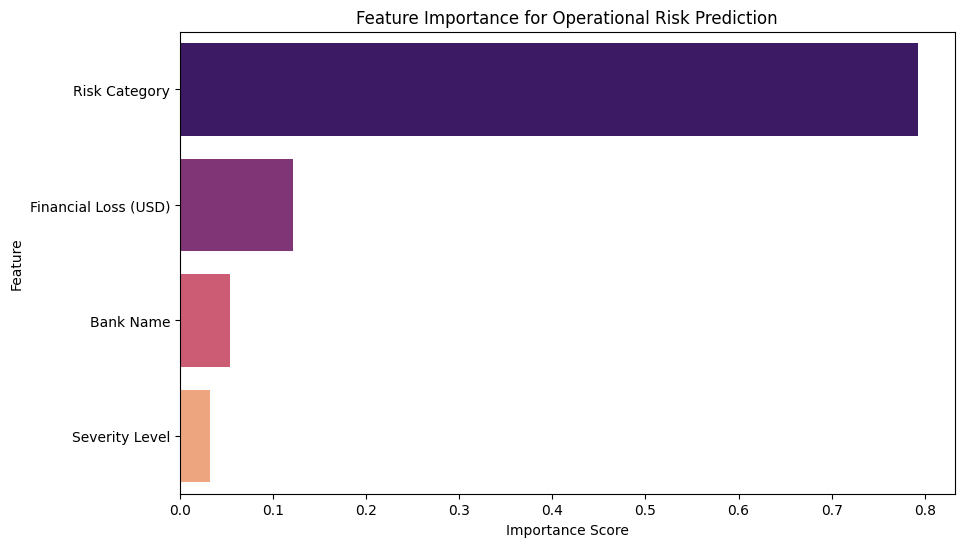

<ipython-input-4-9e45cf9377f2>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")


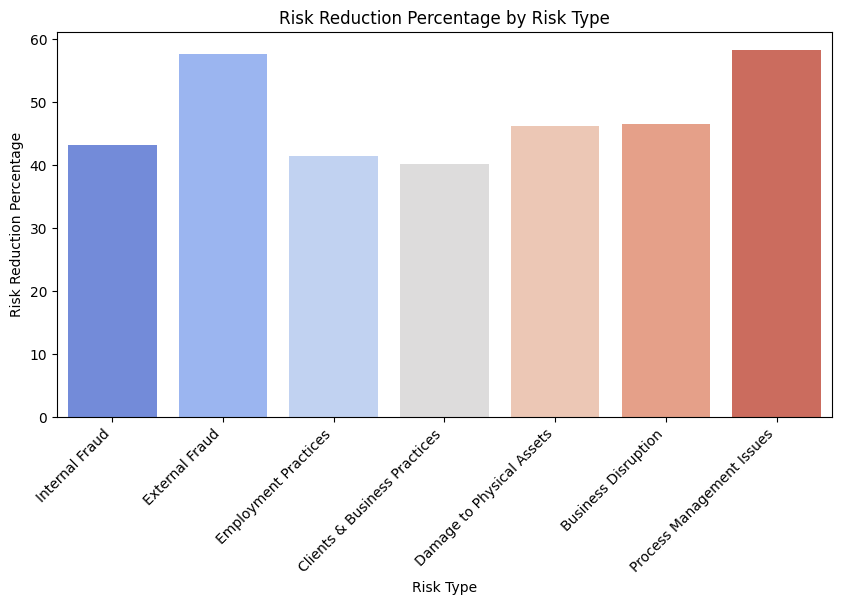

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Selecting features for clustering and classification
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: PCA with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Train a Random Forest Classifier for Risk Prediction
y = df["Risk Category"]
X_train, X_test, y_train, y_test = X_scaled[:150], X_scaled[150:], y[:150], y[150:]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Save the processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)

# Risk Reduction Analysis
risk_factors = ["Internal Fraud", "External Fraud", "Employment Practices", "Clients & Business Practices", "Damage to Physical Assets", "Business Disruption", "Process Management Issues"]
risk_before = np.random.uniform(0.6, 0.8, len(risk_factors))
risk_after = risk_before - np.random.uniform(0.2, 0.4, len(risk_factors))
risk_reduction = (risk_before - risk_after) / risk_before * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Risk Reduction Percentage by Risk Type")
plt.xlabel("Risk Type")
plt.ylabel("Risk Reduction Percentage")
plt.show()


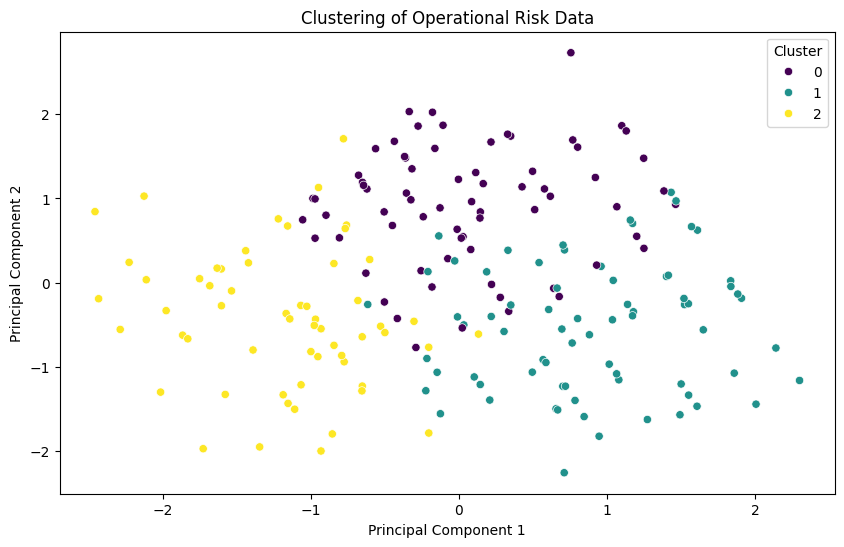

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         7

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[ 4  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  7]]


<ipython-input-5-1b1f5adea726>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")


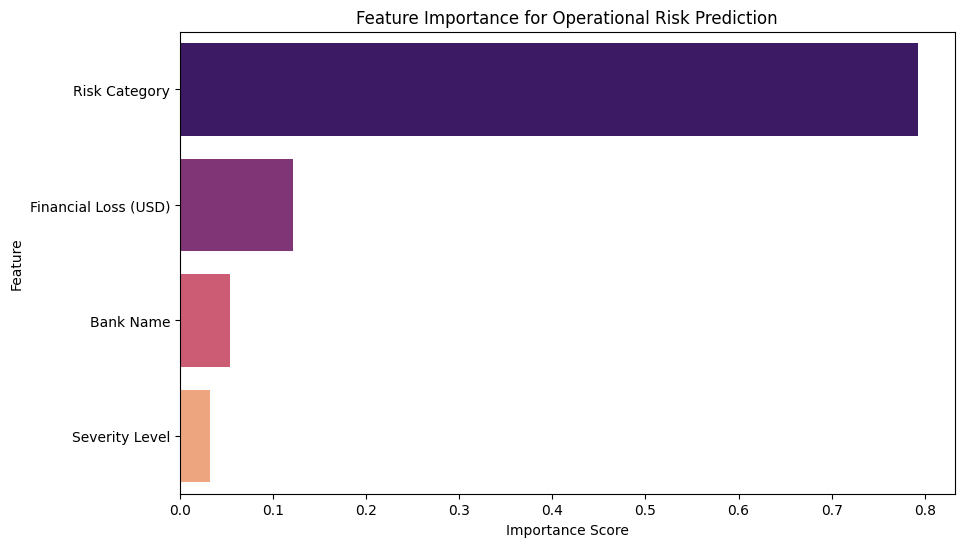

<ipython-input-5-1b1f5adea726>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")


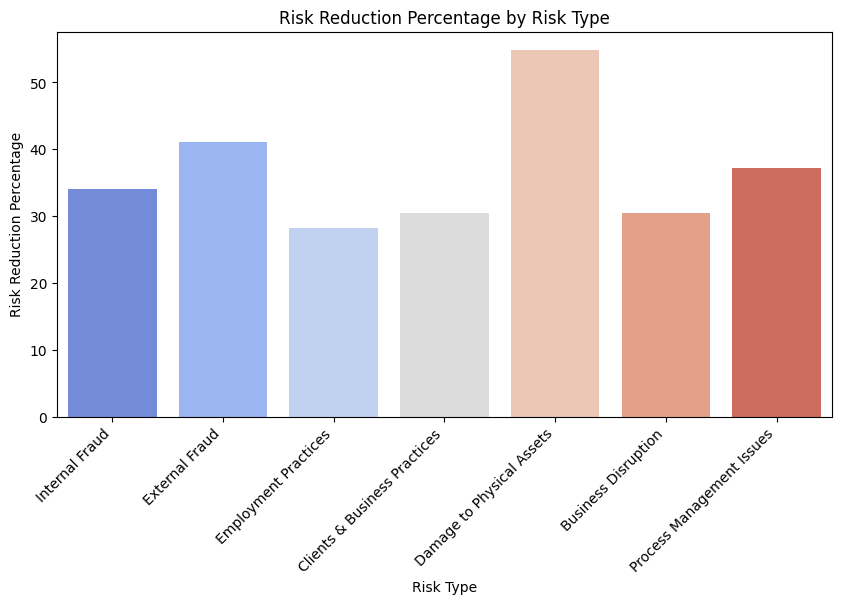

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Selecting features for clustering and classification
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: PCA with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Train a Random Forest Classifier for Risk Prediction
y = df["Risk Category"]
X_train, X_test, y_train, y_test = X_scaled[:150], X_scaled[150:], y[:150], y[150:]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Risk Reduction Analysis
risk_factors = ["Internal Fraud", "External Fraud", "Employment Practices", "Clients & Business Practices", "Damage to Physical Assets", "Business Disruption", "Process Management Issues"]
risk_before = np.random.uniform(0.6, 0.8, len(risk_factors))
risk_after = risk_before - np.random.uniform(0.2, 0.4, len(risk_factors))
risk_reduction = (risk_before - risk_after) / risk_before * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Risk Reduction Percentage by Risk Type")
plt.xlabel("Risk Type")
plt.ylabel("Risk Reduction Percentage")
plt.show()

# Save the processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)

Descriptive Statistics:
        Bank Name          Report Date  Risk Category  Financial Loss (USD)  \
count  200.000000                  200     200.000000            200.000000   
mean     4.265000  2024-07-05 16:40:48       3.065000         478159.610000   
min      0.000000  2024-01-02 00:00:00       0.000000          14337.000000   
25%      2.000000  2024-04-16 12:00:00       1.750000         229599.500000   
50%      4.000000  2024-06-21 12:00:00       3.000000         475781.500000   
75%      7.000000  2024-10-06 06:00:00       5.000000         730076.250000   
max      9.000000  2024-12-30 00:00:00       6.000000         998176.000000   
std      2.834599                  NaN       1.902333         283432.211658   

       Severity Level  
count      200.000000  
mean         1.325000  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          2.000000  
std          0.782584  


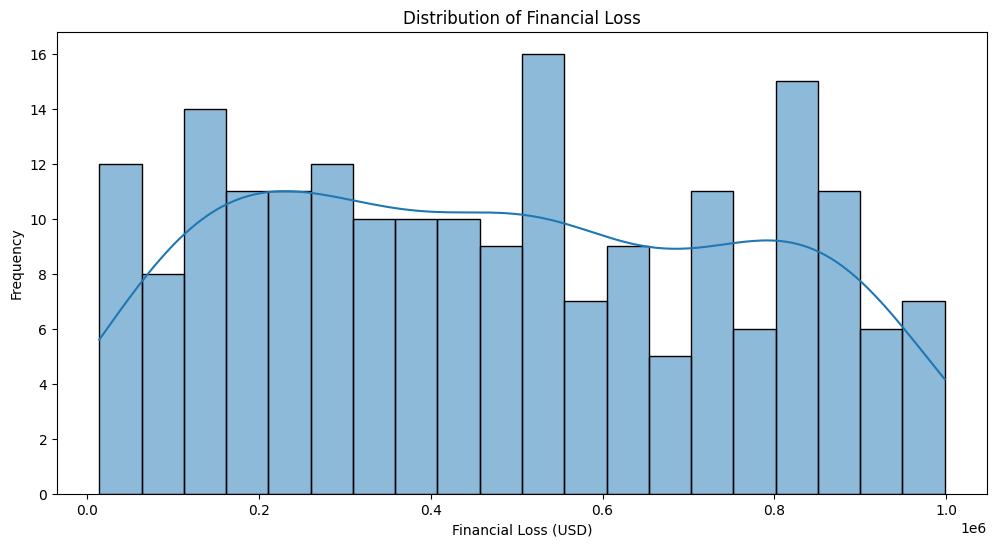

<ipython-input-3-fcb6e16adc1c>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Risk Category"], y=df["Financial Loss (USD)"], palette="coolwarm")


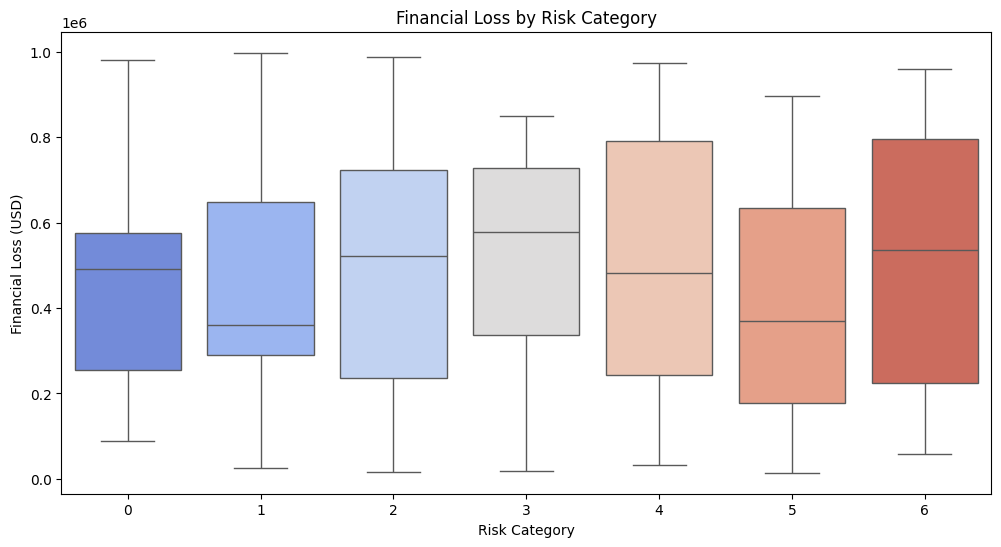

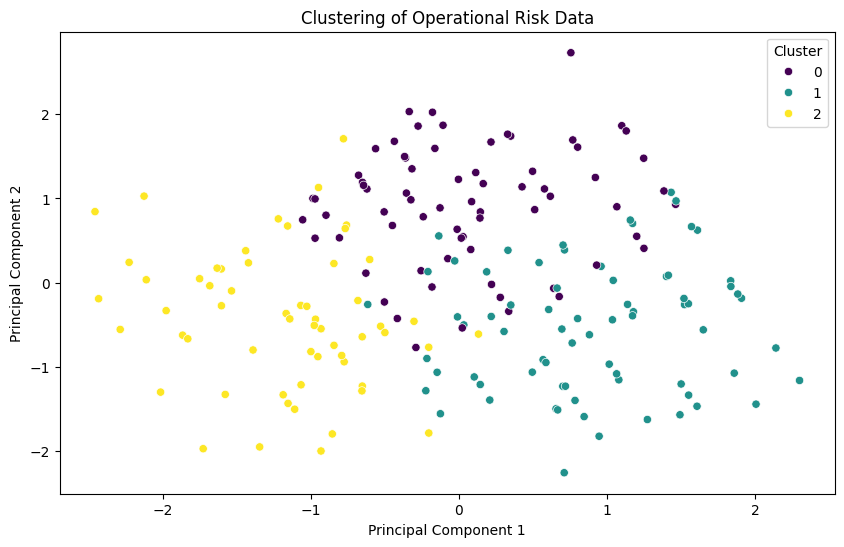

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
[[ 3  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  4]]


<ipython-input-3-fcb6e16adc1c>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")


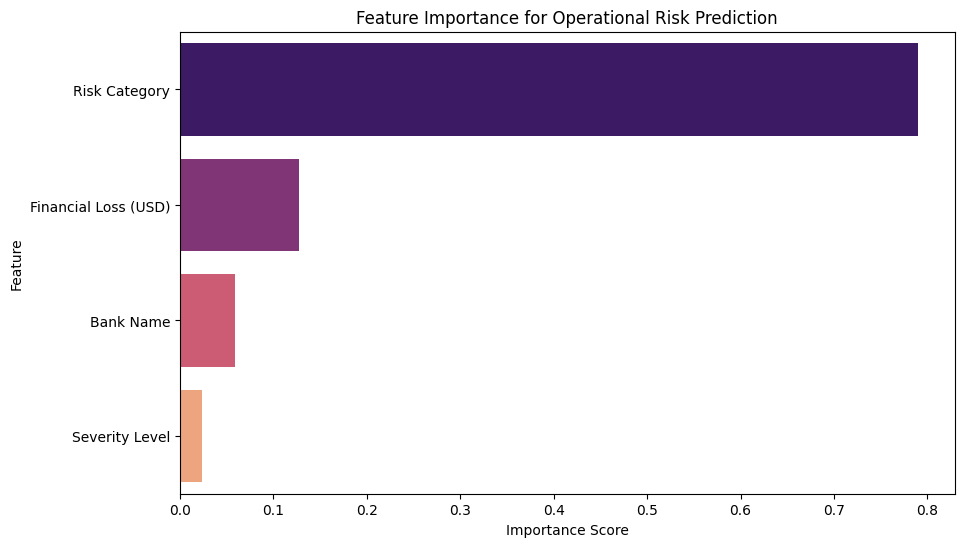

<ipython-input-3-fcb6e16adc1c>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")


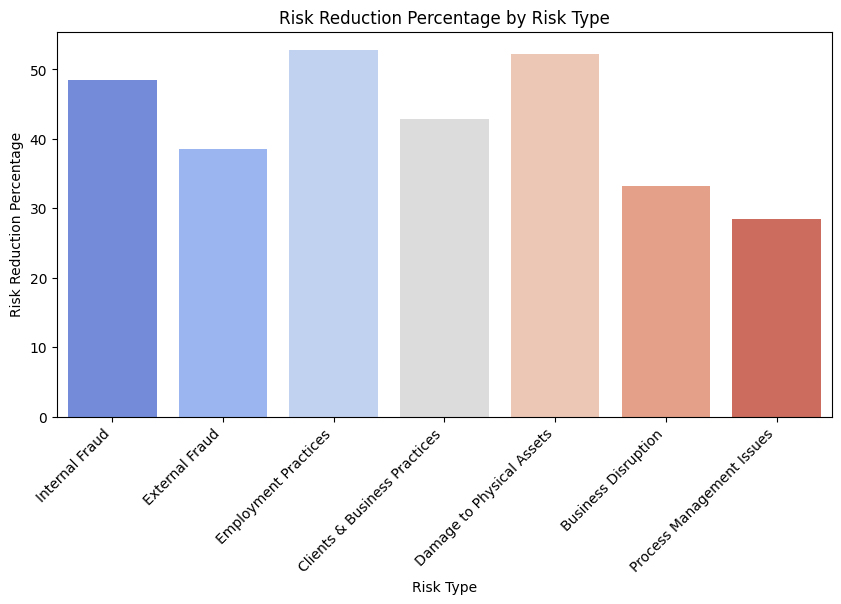

<ipython-input-3-fcb6e16adc1c>:113: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Financial Loss (USD)"].resample("M").sum().plot(figsize=(12, 6), title="Monthly Operational Risk Losses", ylabel="Total Loss (USD)")


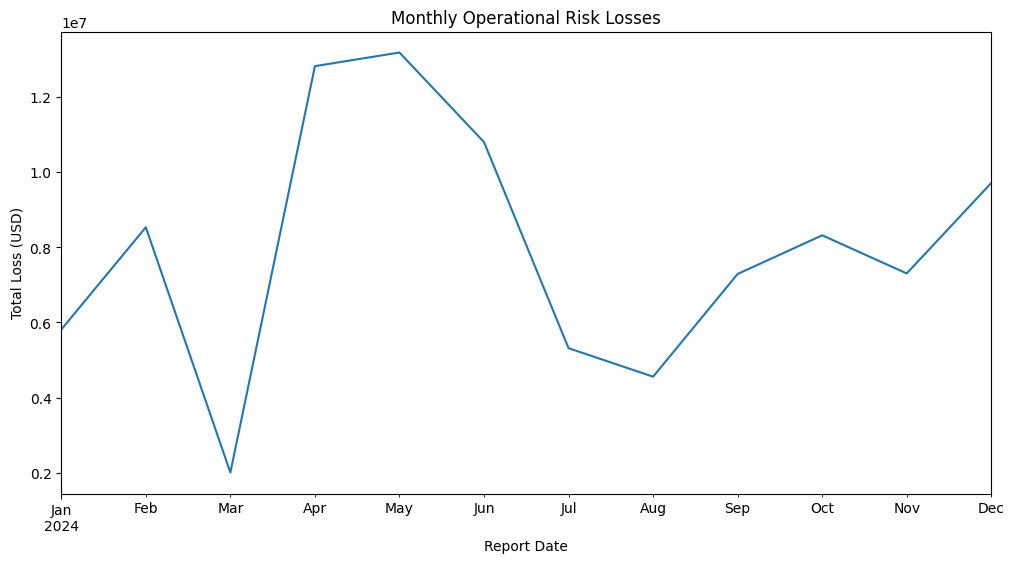

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.1667 - loss: 0.6204 - val_accuracy: 0.1250 - val_loss: 0.3868
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1550 - loss: 0.2441 - val_accuracy: 0.1250 - val_loss: -0.1715
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1826 - loss: -0.5731 - val_accuracy: 0.1250 - val_loss: -1.5651
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1477 - loss: -2.9707 - val_accuracy: 0.1250 - val_loss: -5.7058
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1764 - loss: -8.5131 - val_accuracy: 0.1250 - val_loss: -15.3920
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1354 - loss: -20.2952 - val_accuracy: 0.1500 - val_loss: -29.1014
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1836 - loss: -37.3059 - val_accuracy: 0.1250 - val_loss: -45.1170
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1753 - loss: -51.3879 - val_a

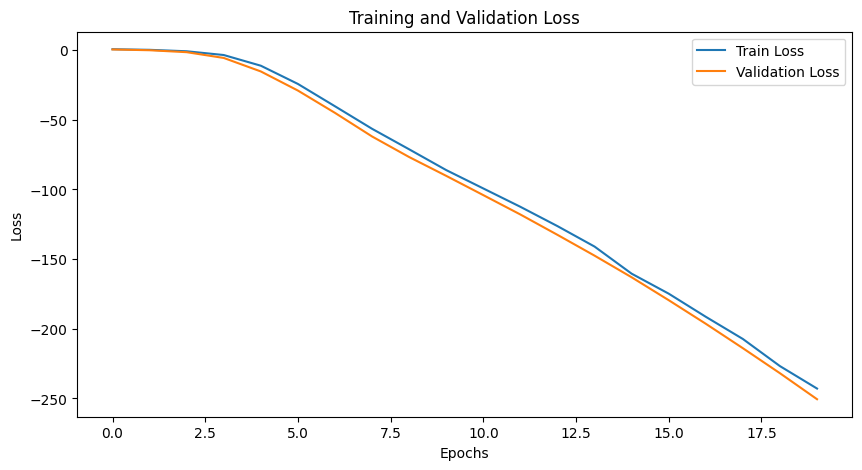

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Selecting features for clustering and classification
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.histplot(df["Financial Loss (USD)"], bins=20, kde=True)
plt.title("Distribution of Financial Loss")
plt.xlabel("Financial Loss (USD)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Risk Category"], y=df["Financial Loss (USD)"], palette="coolwarm")
plt.title("Financial Loss by Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Financial Loss (USD)")
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: PCA with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Train a Random Forest Classifier for Risk Prediction
y = df["Risk Category"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Risk Reduction Analysis
risk_factors = ["Internal Fraud", "External Fraud", "Employment Practices", "Clients & Business Practices", "Damage to Physical Assets", "Business Disruption", "Process Management Issues"]
risk_before = np.random.uniform(0.6, 0.8, len(risk_factors))
risk_after = risk_before - np.random.uniform(0.2, 0.4, len(risk_factors))
risk_reduction = (risk_before - risk_after) / risk_before * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Risk Reduction Percentage by Risk Type")
plt.xlabel("Risk Type")
plt.ylabel("Risk Reduction Percentage")
plt.show()

# Time-Series Analysis of Operational Risks
df["Report Date"] = pd.to_datetime(df["Report Date"])
df.set_index("Report Date", inplace=True)
df["Financial Loss (USD)"].resample("M").sum().plot(figsize=(12, 6), title="Monthly Operational Risk Losses", ylabel="Total Loss (USD)")
plt.show()

# Deep Learning Model Setup
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Save the processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Selecting features for clustering and classification
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]
y = df["Risk Category"]

# Normalize input data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())


# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.histplot(df["Financial Loss (USD)"], bins=20, kde=True)
plt.title("Distribution of Financial Loss")
plt.xlabel("Financial Loss (USD)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Risk Category"], y=df["Financial Loss (USD)"], palette="coolwarm")
plt.title("Financial Loss by Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Financial Loss (USD)")
plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: PCA with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Train a Random Forest Classifier for Risk Prediction
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Risk Reduction Analysis
risk_factors = ["Internal Fraud", "External Fraud", "Employment Practices",
                "Clients & Business Practices", "Damage to Physical Assets",
                "Business Disruption", "Process Management Issues"]
risk_before = np.random.uniform(0.6, 0.8, len(risk_factors))
risk_after = risk_before - np.random.uniform(0.2, 0.4, len(risk_factors))
risk_reduction = (risk_before - risk_after) / risk_before * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=risk_factors, y=risk_reduction, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Risk Reduction Percentage by Risk Type")
plt.xlabel("Risk Type")
plt.ylabel("Risk Reduction Percentage")
plt.show()

# Time-Series Analysis of Operational Risks
df["Report Date"] = pd.to_datetime(df["Report Date"])
df.set_index("Report Date", inplace=True)
df["Financial Loss (USD)"].resample("M").sum().plot(figsize=(12, 6), title="Monthly Operational Risk Losses", ylabel="Total Loss (USD)")
plt.show()

# Deep Learning Model Setup
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)


Descriptive Statistics:
        Bank Name          Report Date  Risk Category  Financial Loss (USD)  \
count  200.000000                  200     200.000000            200.000000   
mean     4.265000  2024-07-05 16:40:48       3.065000         478159.610000   
min      0.000000  2024-01-02 00:00:00       0.000000          14337.000000   
25%      2.000000  2024-04-16 12:00:00       1.750000         229599.500000   
50%      4.000000  2024-06-21 12:00:00       3.000000         475781.500000   
75%      7.000000  2024-10-06 06:00:00       5.000000         730076.250000   
max      9.000000  2024-12-30 00:00:00       6.000000         998176.000000   
std      2.834599                  NaN       1.902333         283432.211658   

       Severity Level  
count      200.000000  
mean         1.325000  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          2.000000  
std          0.782584  


ValueError: could not convert string to float: 'Unauthorized transaction by employee detected.'

<Figure size 1000x600 with 0 Axes>

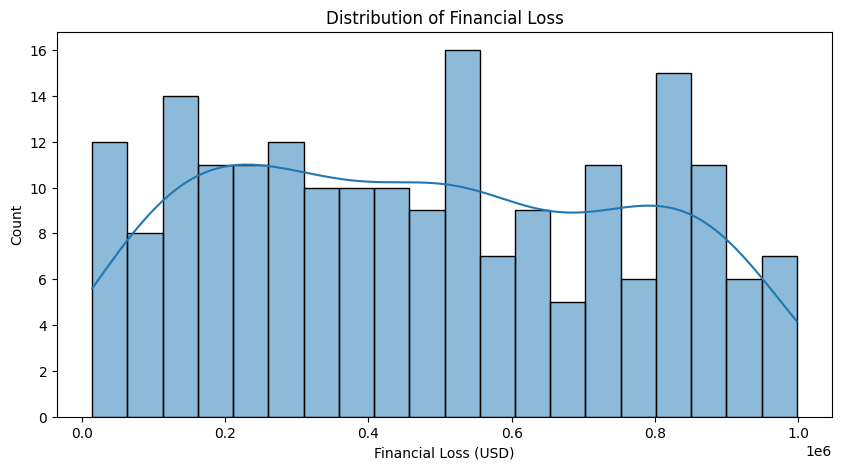

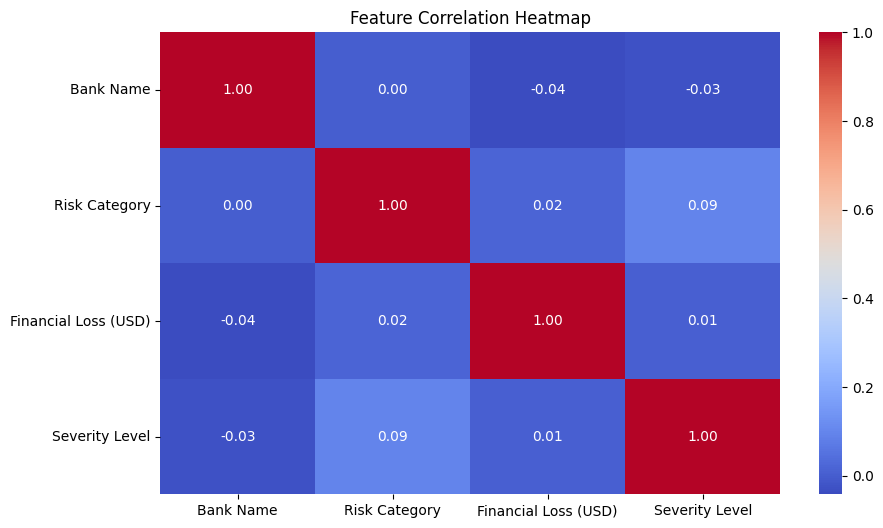

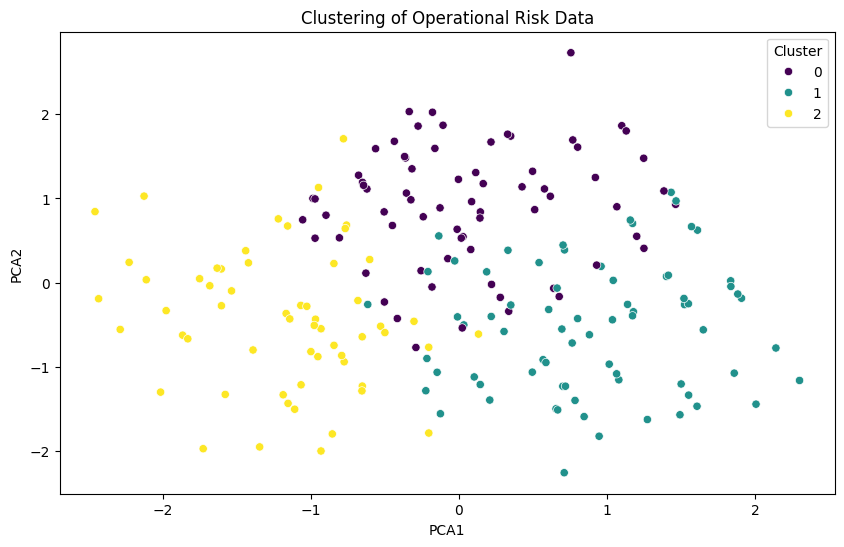

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
          

<ipython-input-9-cde2e39b857c>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")


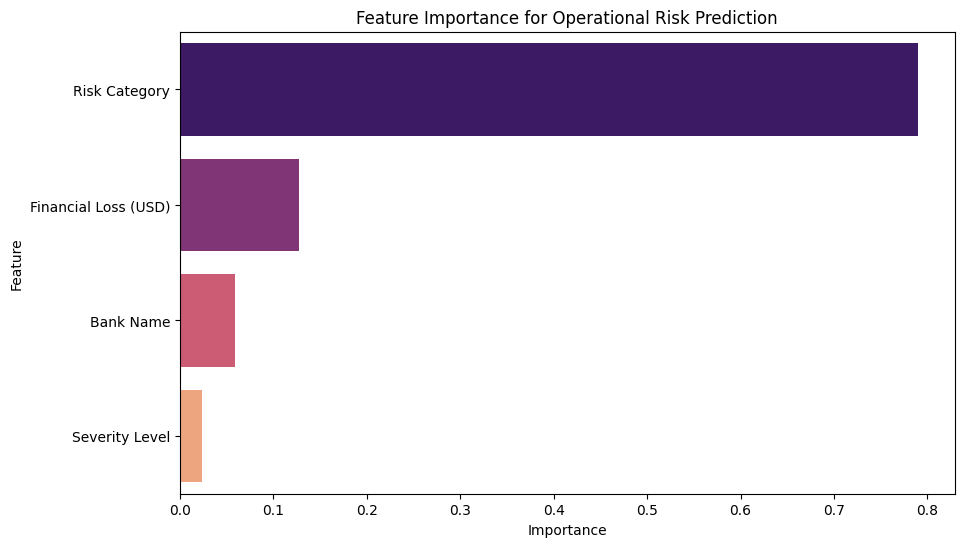

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.0850 - loss: 0.6815 - val_accuracy: 0.1250 - val_loss: 0.4452
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1010 - loss: -3.1115 - val_accuracy: 0.1250 - val_loss: 0.1671
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1021 - loss: -6.5822 - val_accuracy: 0.1250 - val_loss: -0.1162
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1364 - loss: -10.0848 - val_accuracy: 0.1250 - val_loss: -0.4327
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1256 - loss: -13.0975 - val_accuracy: 0.1250 - val_loss: -0.8111
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1064 - loss: -17.1578 - val_accuracy: 0.1250 - val_loss: -1.1462
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1315 - loss: -23.1820 - val_accuracy: 0.1250 - val_loss: -1.4698
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1061 - loss: -28.0292 - val_acc

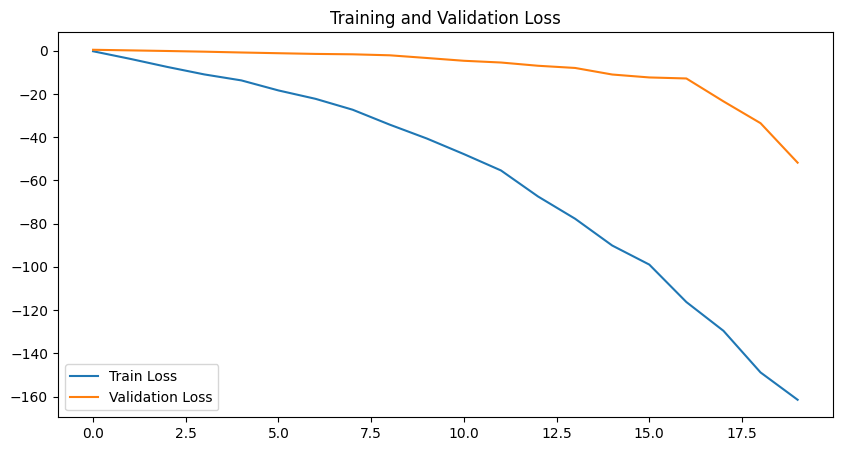

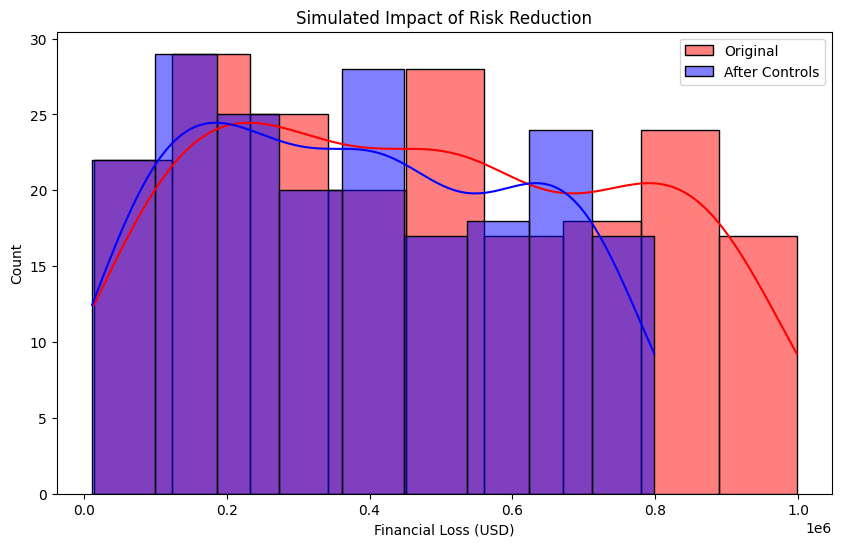

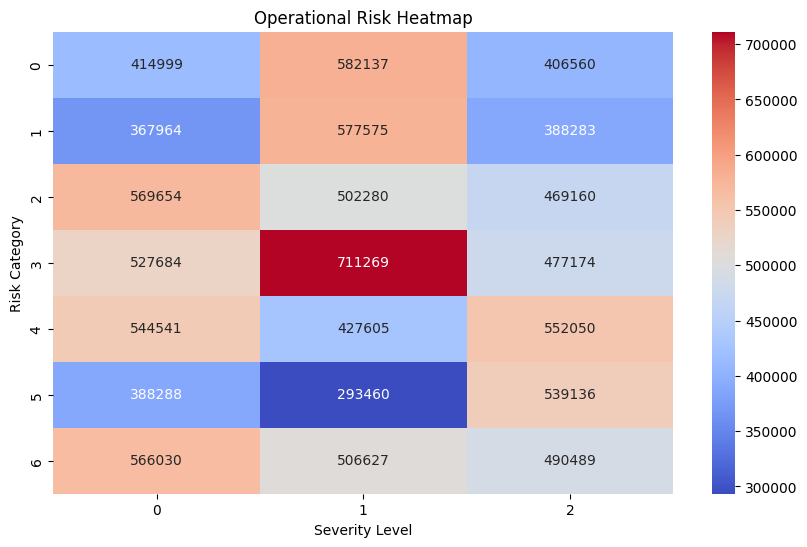

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
import plotly.express as px

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Feature selection
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df["Financial Loss (USD)"], bins=20, kde=True)
plt.title("Distribution of Financial Loss")
plt.show()

# Convert categorical columns to numerical if not already encoded
categorical_columns = ["Bank Name", "Risk Category", "Severity Level"]  # Add other categorical columns if needed
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Compute correlation matrix only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# PCA & Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.show()

# Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X_scaled)

# Predictive Modeling (Random Forest & XGBoost)
y = df["Risk Category"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Feature Importance
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.show()

# Deep Learning Model (LSTM for Risk Prediction)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Scenario Analysis: Risk Reduction Simulation
df["Reduced Loss"] = df["Financial Loss (USD)"] * 0.8  # 20% reduction in financial loss
plt.figure(figsize=(10, 6))
sns.histplot(df["Financial Loss (USD)"], label="Original", color="red", kde=True)
sns.histplot(df["Reduced Loss"], label="After Controls", color="blue", kde=True)
plt.title("Simulated Impact of Risk Reduction")
plt.legend()
plt.show()

# Risk Heatmap
risk_pivot = df.pivot_table(values="Financial Loss (USD)", index="Risk Category", columns="Severity Level", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(risk_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Operational Risk Heatmap")
plt.show()

# Interactive Visualization
fig = px.scatter(df, x="PCA1", y="PCA2", color="Risk Category", size="Financial Loss (USD)")
fig.show()

# Save processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)


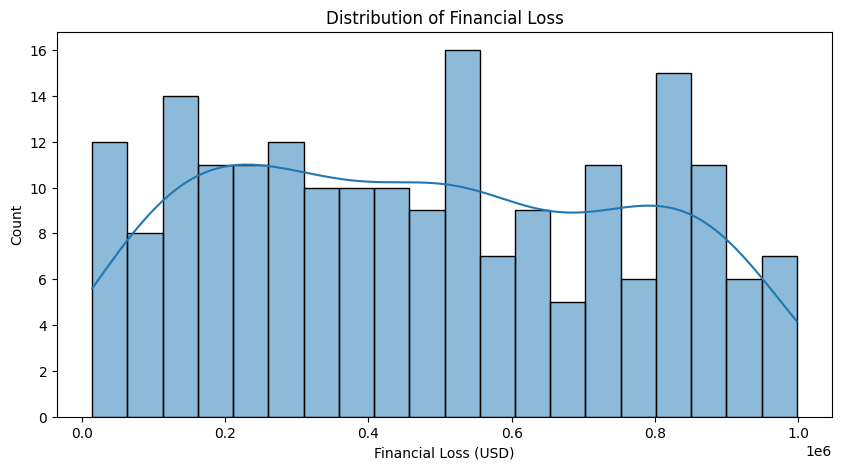

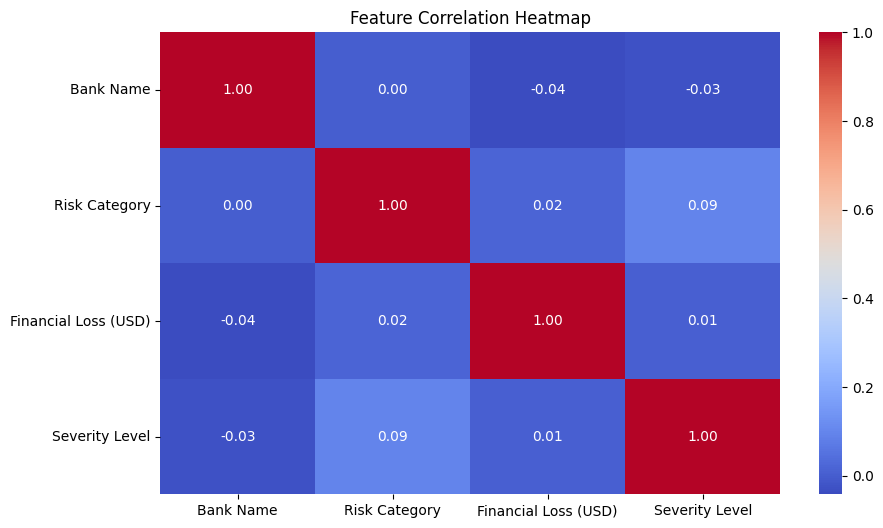

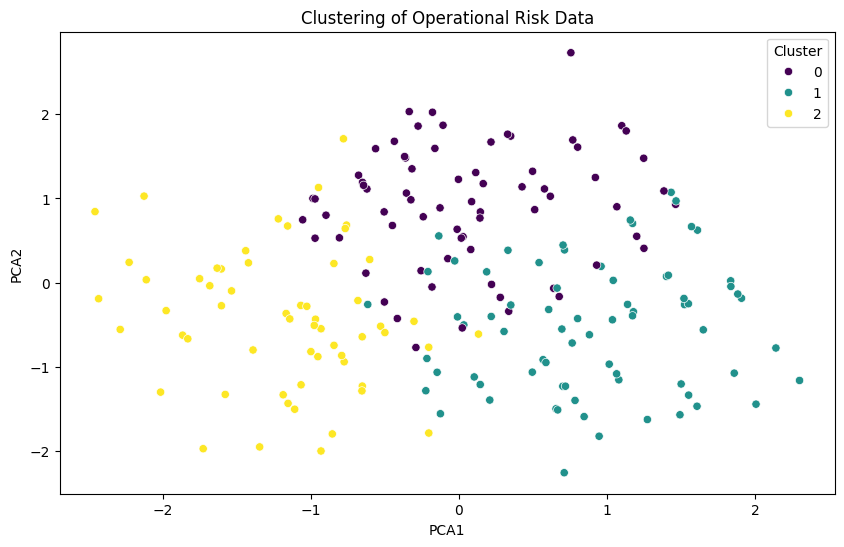

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
          

<ipython-input-9-cde2e39b857c>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")


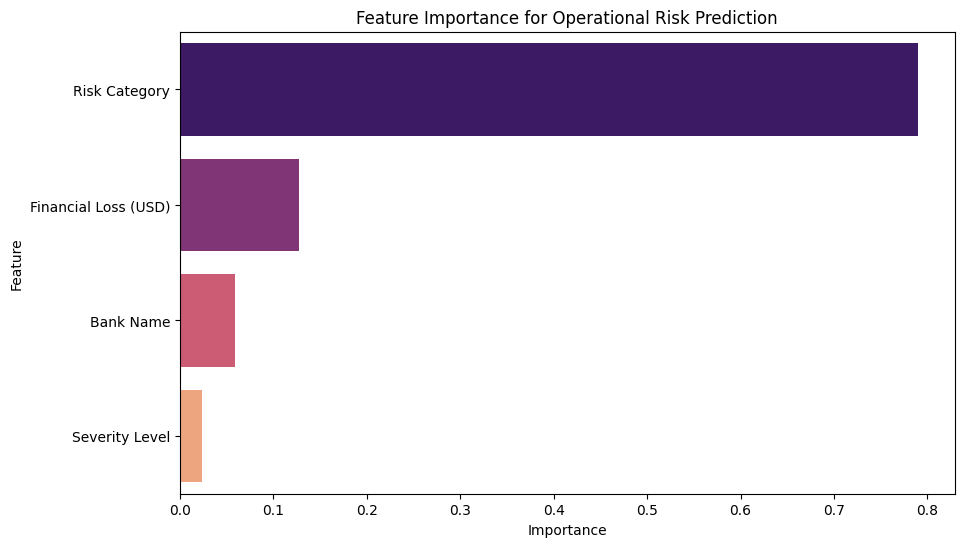

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.0850 - loss: 0.6815 - val_accuracy: 0.1250 - val_loss: 0.4452
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1010 - loss: -3.1115 - val_accuracy: 0.1250 - val_loss: 0.1671
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1021 - loss: -6.5822 - val_accuracy: 0.1250 - val_loss: -0.1162
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1364 - loss: -10.0848 - val_accuracy: 0.1250 - val_loss: -0.4327
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1256 - loss: -13.0975 - val_accuracy: 0.1250 - val_loss: -0.8111
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1064 - loss: -17.1578 - val_accuracy: 0.1250 - val_loss: -1.1462
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1315 - loss: -23.1820 - val_accuracy: 0.1250 - val_loss: -1.4698
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1061 - loss: -28.0292 - val_acc

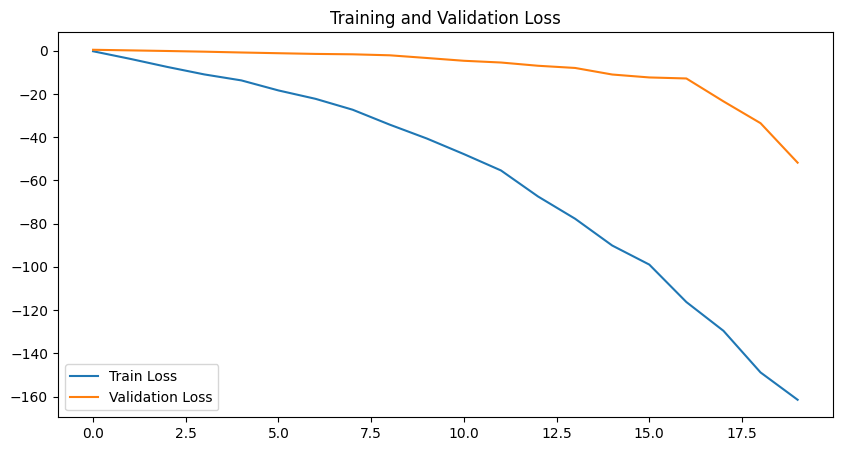

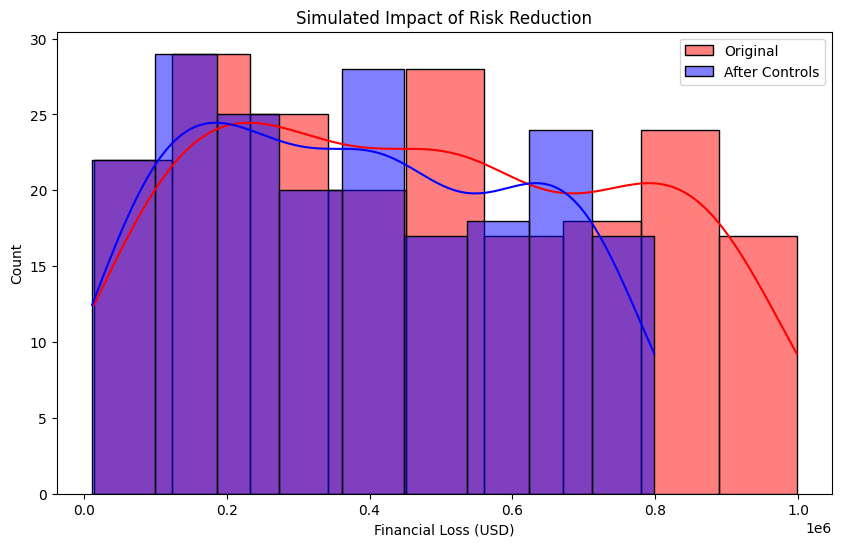

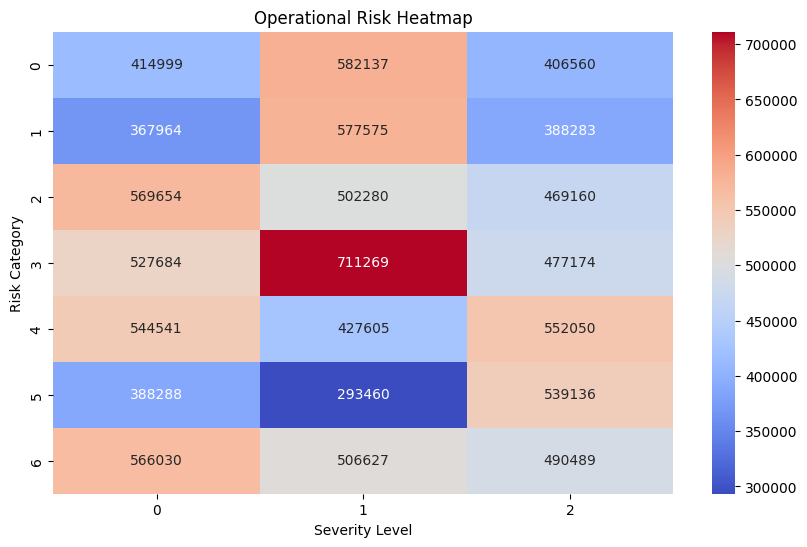

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
import plotly.express as px

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Feature selection
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df["Financial Loss (USD)"], bins=20, kde=True)
plt.title("Distribution of Financial Loss")
plt.show()

# Convert categorical columns to numerical if not already encoded
categorical_columns = ["Bank Name", "Risk Category", "Severity Level"]  # Add other categorical columns if needed
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Compute correlation matrix only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# PCA & Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.show()

# Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X_scaled)

# Predictive Modeling (Random Forest & XGBoost)
y = df["Risk Category"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Feature Importance
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.show()

# Deep Learning Model (LSTM for Risk Prediction)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Scenario Analysis: Risk Reduction Simulation
df["Reduced Loss"] = df["Financial Loss (USD)"] * 0.8  # 20% reduction in financial loss
plt.figure(figsize=(10, 6))
sns.histplot(df["Financial Loss (USD)"], label="Original", color="red", kde=True)
sns.histplot(df["Reduced Loss"], label="After Controls", color="blue", kde=True)
plt.title("Simulated Impact of Risk Reduction")
plt.legend()
plt.show()

# Risk Heatmap
risk_pivot = df.pivot_table(values="Financial Loss (USD)", index="Risk Category", columns="Severity Level", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(risk_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Operational Risk Heatmap")
plt.show()

# Interactive Visualization
fig = px.scatter(df, x="PCA1", y="PCA2", color="Risk Category", size="Financial Loss (USD)")
fig.show()

# Save processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)


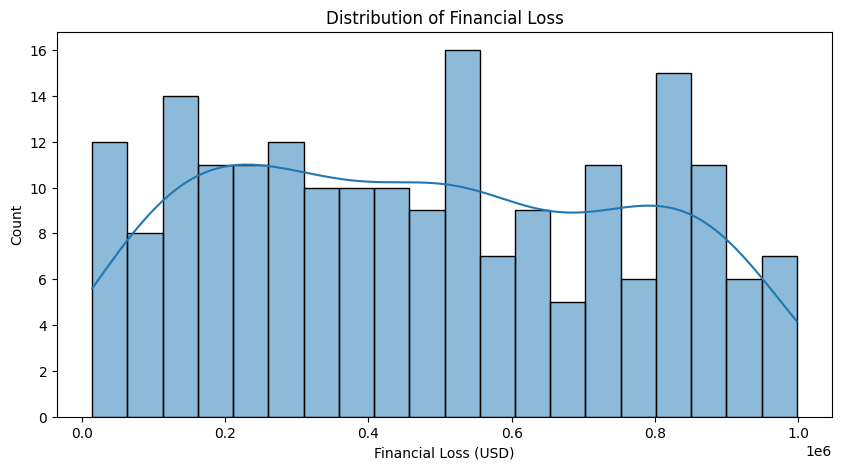

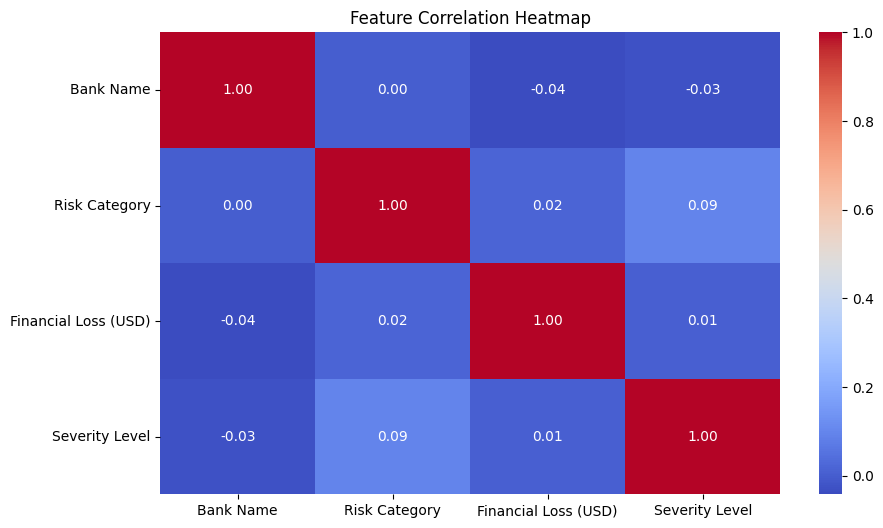

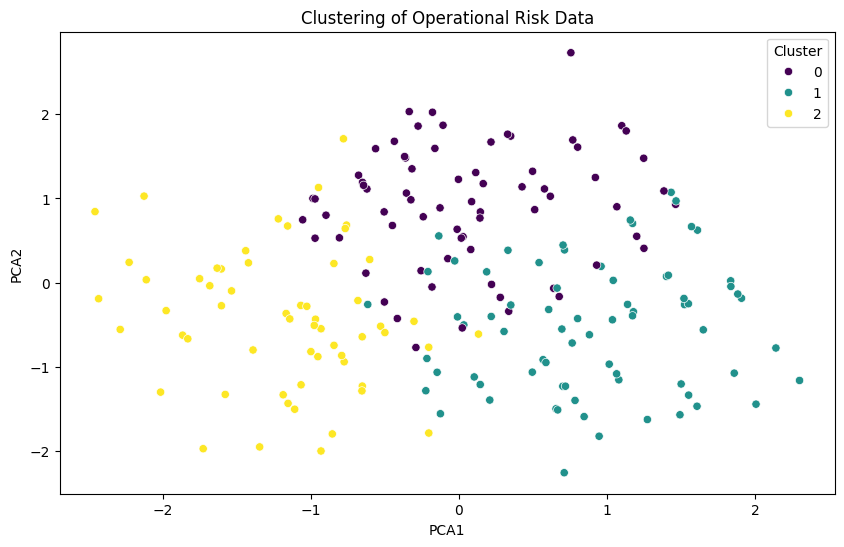

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
          

<ipython-input-9-cde2e39b857c>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")


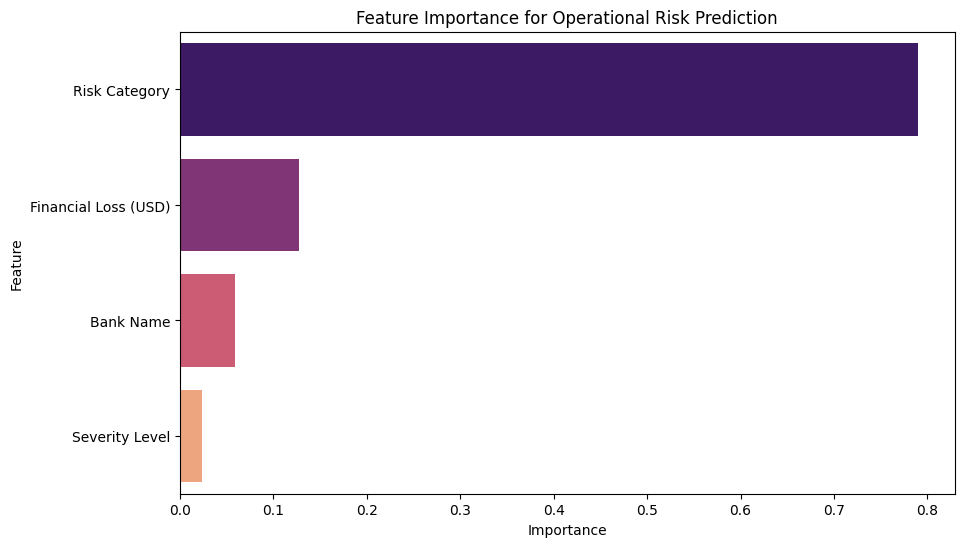

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.0850 - loss: 0.6815 - val_accuracy: 0.1250 - val_loss: 0.4452
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1010 - loss: -3.1115 - val_accuracy: 0.1250 - val_loss: 0.1671
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1021 - loss: -6.5822 - val_accuracy: 0.1250 - val_loss: -0.1162
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1364 - loss: -10.0848 - val_accuracy: 0.1250 - val_loss: -0.4327
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1256 - loss: -13.0975 - val_accuracy: 0.1250 - val_loss: -0.8111
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1064 - loss: -17.1578 - val_accuracy: 0.1250 - val_loss: -1.1462
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1315 - loss: -23.1820 - val_accuracy: 0.1250 - val_loss: -1.4698
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1061 - loss: -28.0292 - val_acc

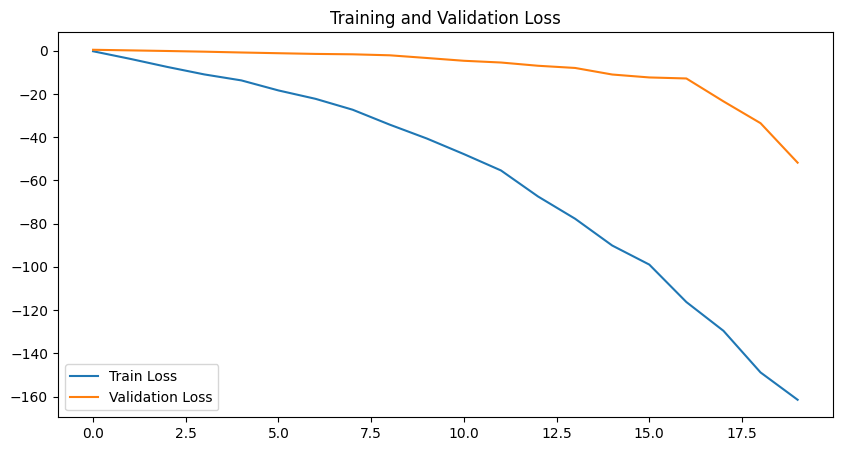

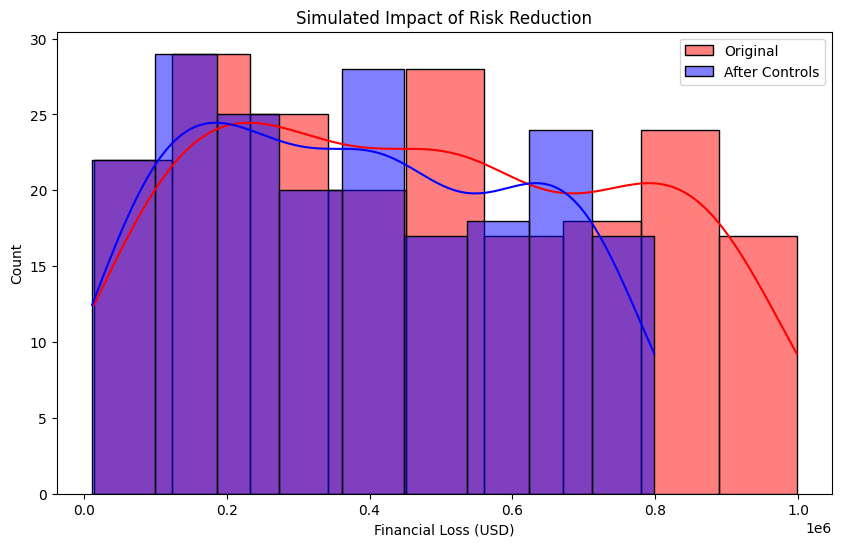

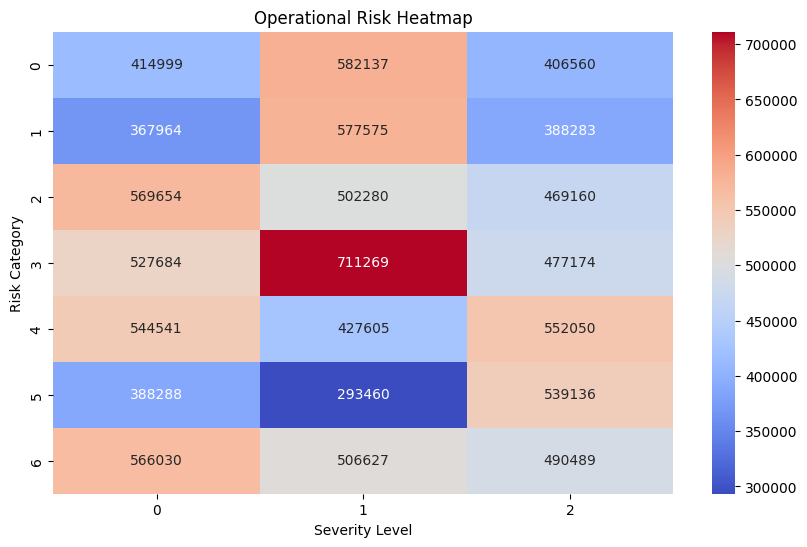

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
import plotly.express as px

# Load modified bank risk dataset
df = pd.read_excel("Bank_Risk_Dataset.xlsx")

# Encode categorical columns
label_encoder = LabelEncoder()
df["Bank Name"] = label_encoder.fit_transform(df["Bank Name"])
df["Risk Category"] = label_encoder.fit_transform(df["Risk Category"])
df["Severity Level"] = label_encoder.fit_transform(df["Severity Level"])

# Feature selection
features = ["Bank Name", "Risk Category", "Financial Loss (USD)", "Severity Level"]
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df["Financial Loss (USD)"], bins=20, kde=True)
plt.title("Distribution of Financial Loss")
plt.show()

# Convert categorical columns to numerical if not already encoded
categorical_columns = ["Bank Name", "Risk Category", "Severity Level"]  # Add other categorical columns if needed
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Compute correlation matrix only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# PCA & Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis")
plt.title("Clustering of Operational Risk Data")
plt.show()

# Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X_scaled)

# Predictive Modeling (Random Forest & XGBoost)
y = df["Risk Category"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Feature Importance
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title("Feature Importance for Operational Risk Prediction")
plt.show()

# Deep Learning Model (LSTM for Risk Prediction)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Scenario Analysis: Risk Reduction Simulation
df["Reduced Loss"] = df["Financial Loss (USD)"] * 0.8  # 20% reduction in financial loss
plt.figure(figsize=(10, 6))
sns.histplot(df["Financial Loss (USD)"], label="Original", color="red", kde=True)
sns.histplot(df["Reduced Loss"], label="After Controls", color="blue", kde=True)
plt.title("Simulated Impact of Risk Reduction")
plt.legend()
plt.show()

# Risk Heatmap
risk_pivot = df.pivot_table(values="Financial Loss (USD)", index="Risk Category", columns="Severity Level", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(risk_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Operational Risk Heatmap")
plt.show()

# Interactive Visualization
fig = px.scatter(df, x="PCA1", y="PCA2", color="Risk Category", size="Financial Loss (USD)")
fig.show()

# Save processed dataset
df.to_excel("Processed_Bank_Risk_Dataset.xlsx", index=False)


In [ ]:
!pip install bayesian-optimization